In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import math

import pickle

In [2]:
chrome_options = Options()
driver = webdriver.Chrome(options=chrome_options)
driver.set_window_size(1200,1000)
driver.get("http://localhost:3000/web1")


In [3]:
current_window_size = driver.get_window_size(windowHandle='current')
print(current_window_size)

{'width': 1200, 'height': 1000}


In [13]:

#update location of element


element_dict = {}
for id in range(1,8):

    element_dict[id] = {}
    element_dict[id]['label'] = {}
    element_dict[id]['input'] = {}
    element_label = driver.find_element("xpath","//label[@for='{}']".format(str(id)))
    element_input = driver.find_element("xpath","//*[@id='{}']".format(str(id)))
    
    element_dict[id]['label']['x_location'] = element_label.location['x']
    element_dict[id]['label']['y_location'] = element_label.location['y']
    element_dict[id]['label']['width'] = element_label.size['width']
    element_dict[id]['label']['height'] = element_label.size['height']
    element_dict[id]['label']['x_centre'] = element_label.location['x'] + round((element_label.size['width']/2.0),2)
    element_dict[id]['label']['y_centre'] = element_label.location['y'] + round((element_label.size['height']/1.0),2)
                                                                                        
    element_dict[id]['input']['x_location'] = element_input.location['x']
    element_dict[id]['input']['y_location'] = element_input.location['y']
    element_dict[id]['input']['width'] = element_input.size['width']
    element_dict[id]['input']['height'] = element_input.size['height']
    element_dict[id]['input']['x_centre'] = element_input.location['x'] + round((element_input.size['width']/2.0),1)
    element_dict[id]['input']['y_centre'] = element_input.location['y'] + round((element_input.size['height']/2.0),1)



print(element_dict)



{1: {'label': {'x_location': 76, 'y_location': 134, 'width': 81, 'height': 24, 'x_centre': 116.5, 'y_centre': 158.0}, 'input': {'x_location': 76, 'y_location': 158, 'width': 155, 'height': 38, 'x_centre': 153.5, 'y_centre': 177.0}}, 2: {'label': {'x_location': 255, 'y_location': 134, 'width': 76, 'height': 24, 'x_centre': 293.0, 'y_centre': 158.0}, 'input': {'x_location': 255, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 466.5, 'y_centre': 177.0}}, 3: {'label': {'x_location': 701, 'y_location': 134, 'width': 75, 'height': 24, 'x_centre': 738.5, 'y_centre': 158.0}, 'input': {'x_location': 701, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 912.5, 'y_centre': 177.0}}, 4: {'label': {'x_location': 86, 'y_location': 226, 'width': 203, 'height': 62, 'x_centre': 187.5, 'y_centre': 288.0}, 'input': {'x_location': 86, 'y_location': 250, 'width': 203, 'height': 38, 'x_centre': 187.5, 'y_centre': 269.0}}, 5: {'label': {'x_location': 86, 'y_location': 328, 'width': 203, '

In [5]:
element_html = driver.find_element(By.XPATH, '/html')
print(element_html.location)
print(element_html.size)
image_width = element_html.size['width']
image_height = element_html.size['height']

{'x': 0, 'y': 0}
{'height': 512, 'width': 1200}


In [6]:
#driver.save_screenshot("screenshots/web.jpg")
element_html.screenshot("screenshots/web.jpg")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:352: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


True

In [6]:
#set grid size 
num_grid_x = 10
num_grid_y = 10

(1200, 512)
(1200, 512)


/var/folders/58/gd1m2zgn4hzgrrx4xcds_bg80000gp/T/ipykernel_2027/901593594.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = im.resize((image_width, image_height), Image.ANTIALIAS)


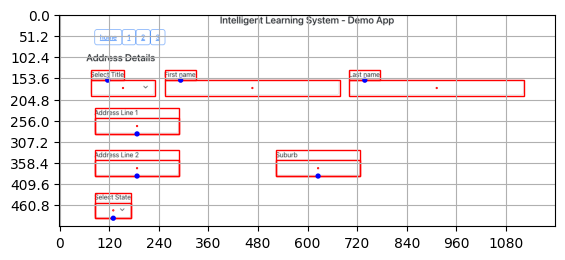

In [14]:
im = Image.open('screenshots/web.jpg')
print(im.size)

#resize
im = im.resize((image_width, image_height), Image.ANTIALIAS)
#im = im.resize((current_window_size['width'], current_window_size['height']), Image.ANTIALIAS)
print(im.size)

# Create figure and axes
fig, ax = plt.subplots()

# grid spacing
x_ticks = np.arange(0, image_width, round((image_width / num_grid_x),2))
y_ticks = np.arange(0, image_height, round((image_height / num_grid_x),2))


ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.grid(True)

# Display the image
ax.imshow(im)



for id in range(1,8):

    rect_input = patches.Rectangle((element_dict[id]['input']['x_location'] , element_dict[id]['input']['y_location']), element_dict[id]['input']['width'], element_dict[id]['input']['height'], linewidth=1, edgecolor='r', facecolor='none')
    x_centre_input = element_dict[id]['input']['x_centre']
    y_centre_input = element_dict[id]['input']['y_centre']

    rect_label = patches.Rectangle((element_dict[id]['label']['x_location'] , element_dict[id]['label']['y_location']), element_dict[id]['label']['width'], element_dict[id]['label']['height'], linewidth=1, edgecolor='r', facecolor='none')
    x_centre_label = element_dict[id]['label']['x_centre']
    y_centre_label = element_dict[id]['label']['y_centre']

    # Add the patch to the Axes
    ax.add_patch(rect_input)
    ax.add_patch(rect_label)

    #plot cente
    cir_label = patches.Circle((x_centre_label, y_centre_label), radius = 3, linewidth=2, edgecolor='b', facecolor='none')
    cir_input = patches.Circle((x_centre_input, y_centre_input), radius = 1, linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(cir_label)
    ax.add_patch(cir_input)


plt.show()

In [8]:


grid_num = {}

for id in range(1, 8):

    grid_num[id] = {}
    element_dict[id]['label']['grid_num'] = {}
    element_dict[id]['input']['grid_num'] = {}

    y_centre_label = element_dict[id]['label']['y_centre']
    x_centre_label = element_dict[id]['label']['x_centre']

    y_centre_input = element_dict[id]['input']['y_centre']
    x_centre_input = element_dict[id]['input']['x_centre']
    

    row_num_label = math.floor(y_centre_label*num_grid_y/element_html.size['height']) #this is the previous row of the element of interest
    col_num_label = math.ceil(x_centre_label*num_grid_x/element_html.size['width']) #this is the column of the element of interest
    grid_num_label = (row_num_label*num_grid_y) + col_num_label

    row_num_input = math.floor(y_centre_input*num_grid_y/element_html.size['height']) #this is the previous row of the element of interest
    col_num_input = math.ceil(x_centre_input*num_grid_x/element_html.size['width']) #this is the column of the element of interest
    grid_num_input = (row_num_input*num_grid_y) + col_num_input
    
    grid_num[id]['label'] = grid_num_label
    grid_num[id]['input'] = grid_num_input

    element_dict[id]['label']['grid_num'] = grid_num_label
    element_dict[id]['input']['grid_num'] = grid_num_input



print(grid_num)
print("\n", element_dict )

{1: {'label': 21, 'input': 32}, 2: {'label': 23, 'input': 34}, 3: {'label': 27, 'input': 38}, 4: {'label': 52, 'input': 52}, 5: {'label': 72, 'input': 72}, 6: {'label': 76, 'input': 76}, 7: {'label': 92, 'input': 92}}

 {1: {'label': {'x_location': 76, 'y_location': 134, 'width': 81, 'height': 24, 'x_centre': 116.5, 'y_centre': 146.0, 'grid_num': 21}, 'input': {'x_location': 76, 'y_location': 158, 'width': 155, 'height': 38, 'x_centre': 153.5, 'y_centre': 177.0, 'grid_num': 32}}, 2: {'label': {'x_location': 255, 'y_location': 134, 'width': 76, 'height': 24, 'x_centre': 293.0, 'y_centre': 146.0, 'grid_num': 23}, 'input': {'x_location': 255, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 466.5, 'y_centre': 177.0, 'grid_num': 34}}, 3: {'label': {'x_location': 701, 'y_location': 134, 'width': 75, 'height': 24, 'x_centre': 738.5, 'y_centre': 146.0, 'grid_num': 27}, 'input': {'x_location': 701, 'y_location': 158, 'width': 423, 'height': 38, 'x_centre': 912.5, 'y_centre': 177.0, '

In [10]:
#export as pickle

with open('data/element_dictionary.pkl', 'wb') as f:
    pickle.dump(element_dict, f)

In [11]:
#driver.close()

In [14]:
#after training and using those parametes to fetch the actions for a given state.
#load the dictionaly. the dictionary outputs grid number. convert these to coordinates

def grid_to_coordinates(grid_num, image_width, image_height,num_grid_x, num_grid_y):
    
    num_cols, num_rows = math.modf(grid_num / num_grid_y)
    num_cols = round(num_cols,2)*10
    

    y_location = ((num_rows*image_height)/num_grid_y)+ (image_height*0.5/num_grid_y)
    

    x_location = ((num_cols*image_width)/num_grid_x) - (image_width*0.5/num_grid_y)
    
    return (x_location, y_location)

element_html = driver.find_element(By.XPATH, '/html')
action = webdriver.common.action_chains.ActionChains(driver)
for item in range(1, len(element_dict)+1):
    print(item)
    grid_num = element_dict[item]["input"]["grid_num"]
    print("grid_num:\n", grid_num)
    input_location = grid_to_coordinates(grid_num, image_width, image_height,num_grid_x, num_grid_y)
    print("input location:\n", input_location)
    element_html.click()
    action.move_to_element_with_offset(element_html, input_location[0], input_location[1]).click().send_keys("yes").perform()



1
grid_num:
 32
input location:
 (180.0, 179.2)
2
grid_num:
 34
input location:
 (420.0, 179.2)
3
grid_num:
 38
input location:
 (900.0, 179.2)


MoveTargetOutOfBoundsException: Message: move target out of bounds
  (Session info: chrome=112.0.5615.49)
Stacktrace:
0   chromedriver                        0x00000001043d3ae8 chromedriver + 4958952
1   chromedriver                        0x00000001043cb7b3 chromedriver + 4925363
2   chromedriver                        0x0000000103f8d051 chromedriver + 475217
3   chromedriver                        0x000000010401cb4b chromedriver + 1063755
4   chromedriver                        0x0000000103ff6c12 chromedriver + 908306
5   chromedriver                        0x000000010401225b chromedriver + 1020507
6   chromedriver                        0x0000000103ff69e3 chromedriver + 907747
7   chromedriver                        0x0000000103fc0aef chromedriver + 686831
8   chromedriver                        0x0000000103fc200e chromedriver + 692238
9   chromedriver                        0x000000010438f9ad chromedriver + 4680109
10  chromedriver                        0x0000000104394c12 chromedriver + 4701202
11  chromedriver                        0x000000010439b79f chromedriver + 4728735
12  chromedriver                        0x0000000104395b7a chromedriver + 4705146
13  chromedriver                        0x000000010436827e chromedriver + 4518526
14  chromedriver                        0x00000001043b5908 chromedriver + 4835592
15  chromedriver                        0x00000001043b5a87 chromedriver + 4835975
16  chromedriver                        0x00000001043c500f chromedriver + 4898831
17  libsystem_pthread.dylib             0x00007ff8012684e1 _pthread_start + 125
18  libsystem_pthread.dylib             0x00007ff801263f6b thread_start + 15
